In [42]:
#!pip install --upgrade pip
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read multiple CSV files
df1 = pd.read_csv("C:/Users/TKIRAN/Downloads/ecommerce-churn-prediction-main/ecommerce-churn-prediction-main/data/dim_customers.csv")  # Example: Customers.csv
df2 = pd.read_csv("C:/Users/TKIRAN/Downloads/ecommerce-churn-prediction-main/ecommerce-churn-prediction-main/data/dim_location.csv")  # Example: Location.csv
df3 = pd.read_csv("C:/Users/TKIRAN/Downloads/ecommerce-churn-prediction-main/ecommerce-churn-prediction-main/data/dim_payments.csv")  # Example: Payment.csv
df4 = pd.read_csv("C:/Users/TKIRAN/Downloads/ecommerce-churn-prediction-main/ecommerce-churn-prediction-main/data/dim_transactions.csv")  # Example: Transcation.csv

In [4]:
df1.head()

,customer_id,first_name,last_name,gender,age,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,1,Patricia,Macdonald,Female,51,1973-12-16,wilsonchristopher@hotmail.com,(568)800-3705,1,590,3,0,2022-03-10,49,453.22
1,2,Destiny,Evans,Other,56,1968-07-13,garciarobert@meyers.info,3579858634,0,648,4,0,2024-07-02,23,49.87
2,3,Sarah,Stone,Other,21,2003-09-12,gregorynichols@contreras.info,(233)051-2972x83053,0,1783,10,0,2023-06-24,45,178.78
3,4,Tara,Peterson,Female,25,1999-06-04,wcaldwell@yahoo.com,+1-980-912-2768x5416,1,514,9,0,2022-10-09,48,408.14
4,5,Patrick,Petersen,Female,57,1967-11-21,matthew65@miller.com,001-770-382-4507x93902,0,689,2,1,2020-07-24,4,328.80


In [5]:
df2.head()

,location_id,shopping_mall,city,province_state,country
0,1,Mall of America,Bloomington,Minnesota,US
1,2,The Galleria,Houston,Texas,US
2,3,Westfield London,London,England,UK
3,4,Trafford Centre,Manchester,England,UK
4,5,King of Prussia Mall,Philadelphia,Pennsylvania,US


In [6]:
df3.head(10)

,payment_id,payment_method,card_type,Unnamed: 3
0,1,Credit Card - Visa,Visa,NaN
1,2,Credit Card - MasterCard,MasterCard,NaN
2,3,Credit Card - AMEX,AMEX,NaN
3,4,Debit Card - Visa,Visa,NaN
4,5,Debit Card - MasterCard,MasterCard,NaN
5,6,PayPal,NaN,NaN
6,7,Cash,NaN,NaN
7,8,BNPL (Buy Now,Pay Later),NaN
8,9,Apple Pay,NaN,NaN
9,10,Google Pay,NaN,NaN


In [7]:
df4.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7


In [8]:
# Example: Join customers and orders on 'customer_id'
merged_df1 = pd.merge(df4, df3, on="payment_id", how="inner")  # Inner Join
merged_df1.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,payment_method,card_type,Unnamed: 3
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,MasterCard,NaN
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,NaN,NaN
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,NaN,NaN
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,NaN,NaN
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,NaN,NaN


In [9]:
merged_df1.count()

invoice_no        10000
category          10000
item              10000
quantity          10000
price             10000
location_id       10000
customer_id       10000
invoice_date      10000
payment_id        10000
payment_method    10000
card_type          6020
Unnamed: 3            0
dtype: int64

In [10]:
merged_df2 = pd.merge(merged_df1, df2, on="location_id", how="inner")  # Inner Join
merged_df2.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,payment_method,card_type,Unnamed: 3,shopping_mall,city,province_state,country
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,MasterCard,NaN,Mall of America,Bloomington,Minnesota,US
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,NaN,NaN,Fashion Show Mall,Las Vegas,Nevada,US
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,NaN,NaN,Lakeside Shopping Centre,Thurrock,Essex,UK
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,NaN,NaN,Bullring & Grand Central,Birmingham,West Midlands,UK
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,NaN,NaN,The Galleria at Fort Lauderdale,Fort Lauderdale,Florida,US


In [11]:
merged_df2.count()

invoice_no        10000
category          10000
item              10000
quantity          10000
price             10000
location_id       10000
customer_id       10000
invoice_date      10000
payment_id        10000
payment_method    10000
card_type          6020
Unnamed: 3            0
shopping_mall     10000
city              10000
province_state    10000
country           10000
dtype: int64

In [12]:
merged_df3 = pd.merge(merged_df2, df1, on="customer_id", how="left")  # Inner Join
merged_df3.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,payment_method,...,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,...,1999-07-13,michealbender@gmail.com,(309)938-3205x8088,1.0,1056.0,8.0,0.0,2021-08-15,30.0,280.82
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,...,1995-01-18,nicholasclark@flowers.net,(363)377-7602,1.0,1494.0,1.0,0.0,2020-01-19,30.0,52.40
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,...,2002-10-11,geraldcastro@mosley.com,661-041-4070x466,0.0,386.0,6.0,1.0,2021-04-06,42.0,165.90
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,...,1992-12-29,vguerrero@green.org,712-518-4596x428,0.0,482.0,3.0,1.0,2022-05-17,28.0,427.81
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,...,1989-08-17,qfloyd@gmail.com,249-201-6223,0.0,1309.0,2.0,1.0,2023-01-28,31.0,321.20


In [13]:
merged_df3.count()

invoice_no                  10000
category                    10000
item                        10000
quantity                    10000
price                       10000
location_id                 10000
customer_id                 10000
invoice_date                10000
payment_id                  10000
payment_method              10000
card_type                    6020
Unnamed: 3                      0
shopping_mall               10000
city                        10000
province_state              10000
country                     10000
first_name                   9996
last_name                    9996
gender                       9996
age                          9996
dob                          9996
email                        9996
phone_number                 9996
is_churned                   9996
days_since_last_purchase     9996
tenure                       9996
discount_used                9996
last_purchase_date           9996
purchase_frequency           9996
avg_purchase_v

In [14]:
merged_df3['first_name']

0        Tiffany
1         Angela
2       Jonathan
3       Nicholas
4           Tara
          ...   
9995      Wesley
9996     Natasha
9997      Rachel
9998     Jeffrey
9999     Tiffany
Name: first_name, Length: 10000, dtype: object

In [15]:
merged_df3.to_csv("fact_customer.csv")

In [17]:
merged_df3.count()

invoice_no                  10000
category                    10000
item                        10000
quantity                    10000
price                       10000
location_id                 10000
customer_id                 10000
invoice_date                10000
payment_id                  10000
payment_method              10000
card_type                    6020
Unnamed: 3                      0
shopping_mall               10000
city                        10000
province_state              10000
country                     10000
first_name                   9996
last_name                    9996
gender                       9996
age                          9996
dob                          9996
email                        9996
phone_number                 9996
is_churned                   9996
days_since_last_purchase     9996
tenure                       9996
discount_used                9996
last_purchase_date           9996
purchase_frequency           9996
avg_purchase_v

In [18]:
# Display basic info
display(merged_df3.head())

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,payment_method,...,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,...,1999-07-13,michealbender@gmail.com,(309)938-3205x8088,1.0,1056.0,8.0,0.0,2021-08-15,30.0,280.82
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,...,1995-01-18,nicholasclark@flowers.net,(363)377-7602,1.0,1494.0,1.0,0.0,2020-01-19,30.0,52.40
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,...,2002-10-11,geraldcastro@mosley.com,661-041-4070x466,0.0,386.0,6.0,1.0,2021-04-06,42.0,165.90
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,...,1992-12-29,vguerrero@green.org,712-518-4596x428,0.0,482.0,3.0,1.0,2022-05-17,28.0,427.81
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,...,1989-08-17,qfloyd@gmail.com,249-201-6223,0.0,1309.0,2.0,1.0,2023-01-28,31.0,321.20


In [19]:
display(merged_df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   invoice_no                10000 non-null  int64  
 1   category                  10000 non-null  object 
 2   item                      10000 non-null  object 
 3   quantity                  10000 non-null  int64  
 4   price                     10000 non-null  float64
 5   location_id               10000 non-null  int64  
 6   customer_id               10000 non-null  int64  
 7   invoice_date              10000 non-null  object 
 8   payment_id                10000 non-null  int64  
 9   payment_method            10000 non-null  object 
 10  card_type                 6020 non-null   object 
 11  Unnamed: 3                0 non-null      float64
 12  shopping_mall             10000 non-null  object 
 13  city                      10000 non-null  object 
 14  provinc

None

In [20]:
display(merged_df3.describe())

,invoice_no,quantity,price,location_id,customer_id,payment_id,Unnamed: 3,age,is_churned,days_since_last_purchase,tenure,discount_used,purchase_frequency,avg_purchase_value
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.0,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,104999.50000,2.490400,31.062060,30.655300,503.279500,5.491200,NaN,44.094038,0.490496,911.181673,5.610444,0.505702,25.318928,249.147564
std,2886.89568,1.121443,24.461435,17.300682,288.437875,2.863345,NaN,15.548249,0.499935,523.872634,2.908941,0.499992,14.582292,142.459307
min,100000.00000,1.000000,2.010000,1.000000,1.000000,1.000000,NaN,18.000000,0.000000,1.000000,1.000000,0.000000,1.000000,5.010000
25%,102499.75000,1.000000,12.980000,16.000000,251.000000,3.000000,NaN,30.000000,0.000000,484.000000,3.000000,0.000000,12.000000,125.910000
50%,104999.50000,2.000000,22.815000,31.000000,502.000000,5.000000,NaN,44.000000,0.000000,930.000000,6.000000,1.000000,25.000000,253.780000
75%,107499.25000,3.000000,42.972500,46.000000,757.000000,8.000000,NaN,57.000000,1.000000,1362.000000,8.000000,1.000000,38.000000,372.980000
max,109999.00000,4.000000,100.000000,60.000000,1000.000000,10.000000,NaN,70.000000,1.000000,1824.000000,10.000000,1.000000,50.000000,499.910000


In [21]:
# Handle Missing Values
merged_df3.drop(columns=['Unnamed: 3'], inplace=True, errors='ignore')  # Drop unnamed column if exists

In [22]:
merged_df3.fillna(method='ffill', inplace=True)  # Forward fill missing values

C:\Users\TKIRAN\AppData\Local\Temp\ipykernel_18048\2594079212.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df3.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [23]:
# Convert Data Types
merged_df3['invoice_date'] = pd.to_datetime(merged_df3['invoice_date'], errors='coerce')
merged_df3['dob'] = pd.to_datetime(merged_df3['dob'], errors='coerce')
merged_df3['price'] = pd.to_numeric(merged_df3['price'], errors='coerce')
merged_df3['quantity'] = pd.to_numeric(merged_df3['quantity'], errors='coerce')

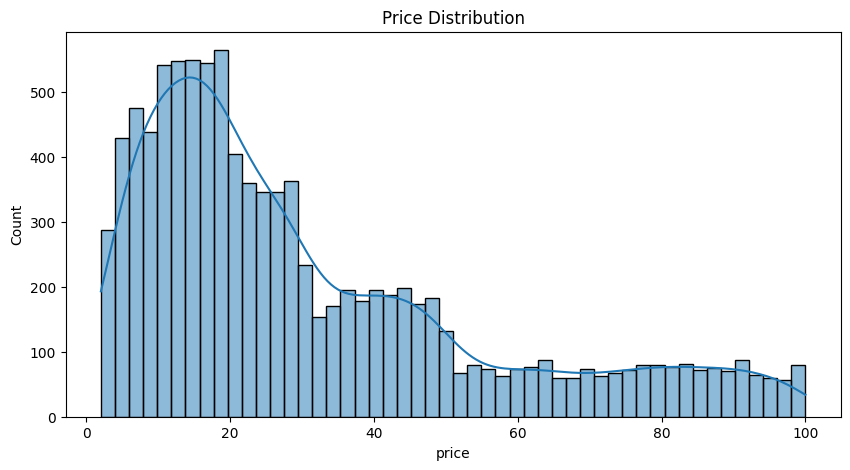

In [24]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
fig = sns.histplot(merged_df3['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

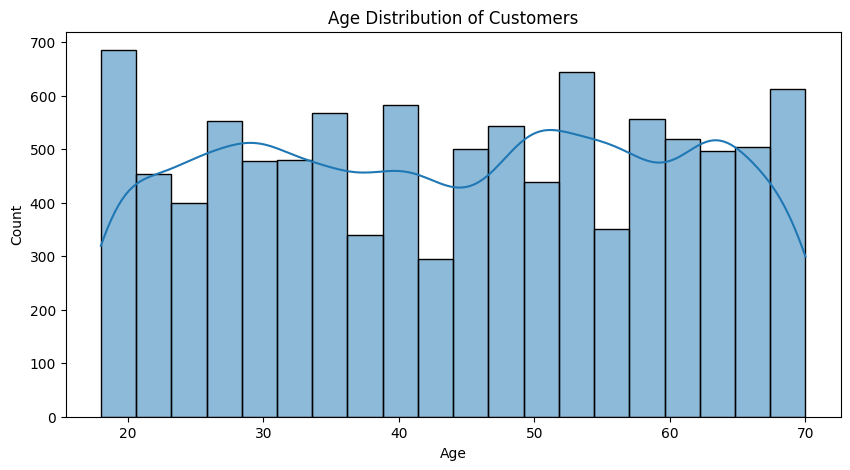

In [25]:
# 1. Distribution of Age Groups
plt.figure(figsize=(10, 5))
sns.histplot(merged_df3['age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

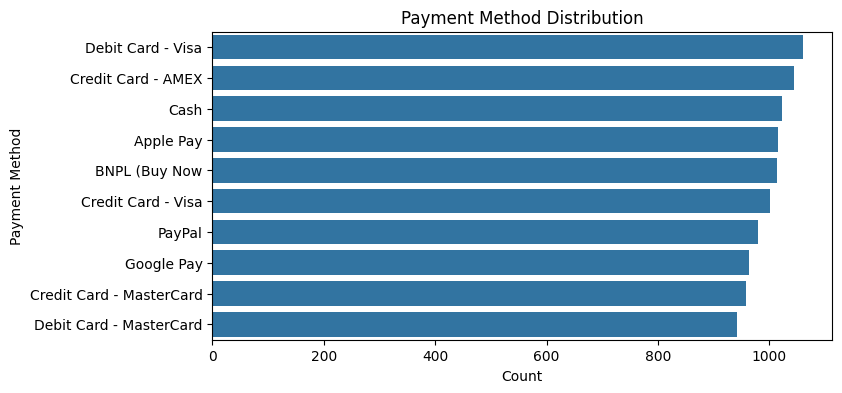

In [26]:
# 2. Payment Method Preferences
plt.figure(figsize=(8, 4))
sns.countplot(y=merged_df3['payment_method'], order=merged_df3['payment_method'].value_counts().index)
plt.title("Payment Method Distribution")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()

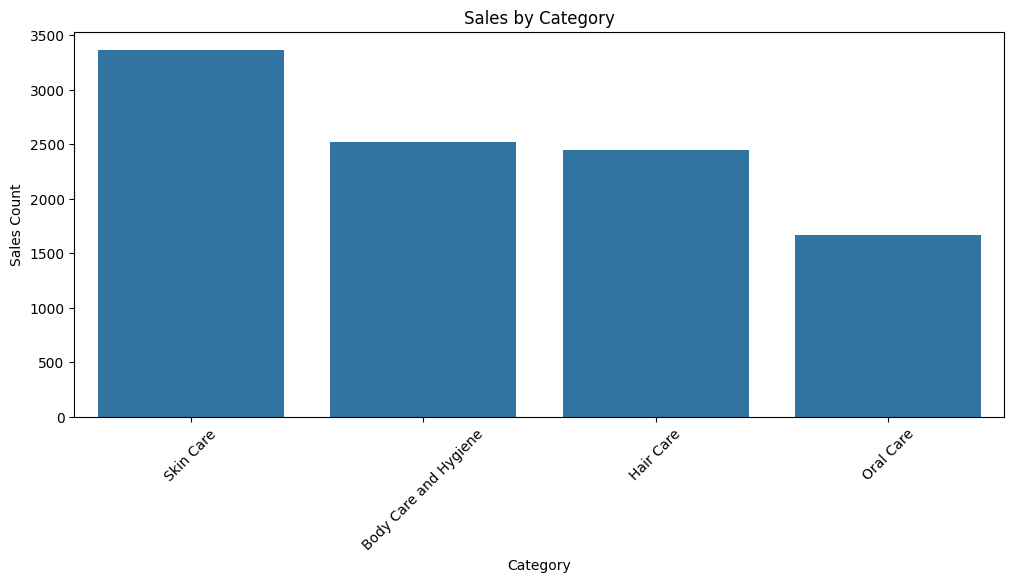

In [27]:
# 3. Sales by Category
plt.figure(figsize=(12, 5))
sns.barplot(x=merged_df3['category'].value_counts().index, y=merged_df3['category'].value_counts().values)
plt.xticks(rotation=45)
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales Count")
plt.show()

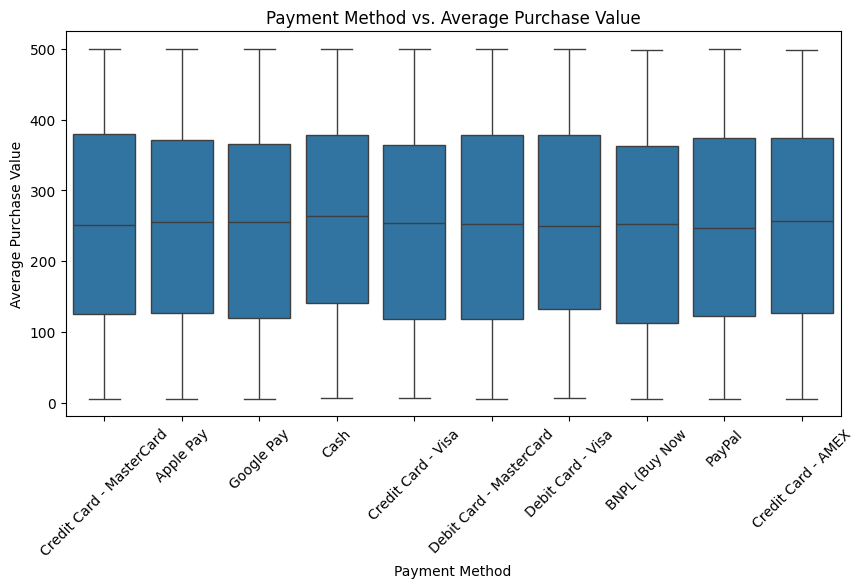

In [28]:
# 10. Payment Method vs. Average Purchase Value
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_df3['payment_method'], y=merged_df3['avg_purchase_value'])
plt.xticks(rotation=45)
plt.title("Payment Method vs. Average Purchase Value")
plt.xlabel("Payment Method")
plt.ylabel("Average Purchase Value")
plt.show()

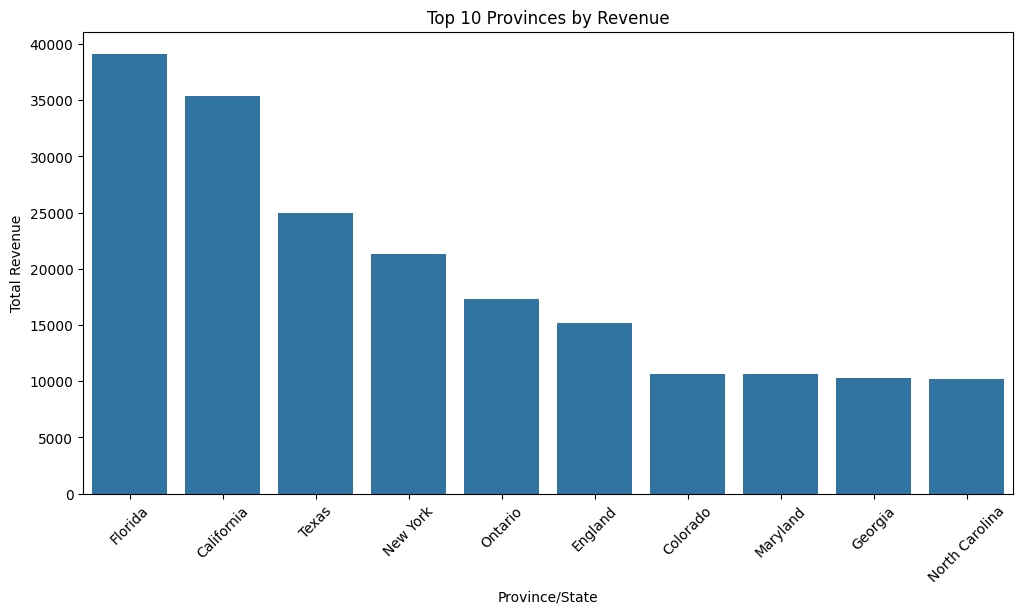

In [29]:
province_revenue = merged_df3.groupby('province_state')['price'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=province_revenue.index, y=province_revenue.values)
plt.xticks(rotation=45)
plt.title("Top 10 Provinces by Revenue")
plt.xlabel("Province/State")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:

# Churn Analysis
churned_customers = df1[df1['is_churned'] == 1]
active_customers = df1[df1['is_churned'] == 0]

plt.figure(figsize=(8, 4))
sns.countplot(x=df1['is_churned'])
plt.title("Churned vs Active Customers")
plt.show()

NameError: name 'df' is not defined

<Figure size 800x400 with 0 Axes>

In [19]:
df1.count()

customer_id                 999
first_name                  999
last_name                   999
gender                      999
age                         999
dob                         999
email                       999
phone_number                999
is_churned                  999
days_since_last_purchase    999
tenure                      999
discount_used               999
last_purchase_date          999
purchase_frequency          999
avg_purchase_value          999
dtype: int64